In [188]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json

In [189]:
dataDfDict ={}

with open('./cityTranslatedData.json', 'r', encoding='utf-8') as f:
    json_data = json.load(f)
for key in json_data.keys():
    for i in range(len(json_data[key]['datas'])):
        if json_data[key]['datas'][i] == "":
            json_data[key]['datas'][i] = json_data[key]['datas'][i-1]
    dataDfDict[key] = pd.DataFrame(json_data[key]['datas'], json_data[key]['labels'])

In [190]:
df = dataDfDict['서울특별시 마포구 상수동']
cutParameter = 0.8
cut = int(len(df) * cutParameter)

In [191]:
for i in df[0]:
    print(i)

75.98299681190221
79.0092879256966
76.911124922312
86.18233618233619
72.58154706430568
58.853311439518336
57.656927972230264
72.88012360265381
66.56590084643288
63.06276336216455
71.35343618513325
84.66327108092813
40.737464313000125
69.29905875641755
62.869822485207095
87.0281852645459
84.43616710487876
68.63459924464962
79.4064567876479
84.39648163204967
71.36075949367087
76.11716318363717
83.43338720849688
74.7910415773682
71.97879858657244
72.62277674542075
81.20429834043365
85.23312883435584
74.50345904931933
73.54111405835545
93.7836544214431
83.34713481285195
88.5605855245324
57.527183444405466
70.1527791737863
74.64285714285714
57.31067701364731
78.30894050270442
69.1638262383059
68.52159468438538
85.60376213592234
73.22258364312268
84.78569737153681
59.748038000826114
75.44731610337972
65.51052513296875
71.08106271658626
83.280353543185
68.84804309935033
79.43848483293128
98.6013986013986
56.422451065167834
83.07692307692308
83.07692307692308
86.90135079819895
69.3513713862120

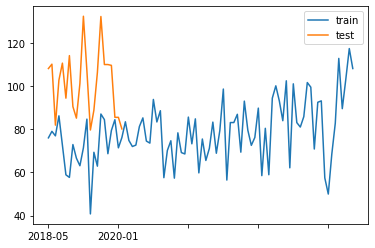

In [192]:
forForecast = df
train = df.iloc[:cut]
test = df.iloc[cut:]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

sc = MinMaxScaler()

# forForecast_sc = sc.fit_transform(forForecast)
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

# forForecast_sc_df = pd.DataFrame(forForecast_sc, columns=['trade_price_idx_value'], index=train.index)
train_sc_df = pd.DataFrame(train_sc, columns=['trade_price_idx_value'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['trade_price_idx_value'], index=test.index)

for s in range(1, 13):
    # forForecast_sc_df['shift_{}'.format(s)] = train_sc_df['trade_price_idx_value'].shift(s)
    train_sc_df['shift_{}'.format(s)] = train_sc_df['trade_price_idx_value'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['trade_price_idx_value'].shift(s)


In [193]:
X_train = train_sc_df.dropna().drop('trade_price_idx_value', axis=1)
y_train = train_sc_df.dropna()[['trade_price_idx_value']]

X_test = test_sc_df.dropna().drop('trade_price_idx_value', axis=1)
y_test = test_sc_df.dropna()[['trade_price_idx_value']]

X_train.head()
X_test.head()
# y_train

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
2019-05,0.865335,1.195490,0.788332,0.579305,0.648936,0.957341,0.700061,0.911876,0.809316,0.536945,0.905584,0.879289
2019-06,0.507562,0.865335,1.195490,0.788332,0.579305,0.648936,0.957341,0.700061,0.911876,0.809316,0.536945,0.905584
2019-07,0.627615,0.507562,0.865335,1.195490,0.788332,0.579305,0.648936,0.957341,0.700061,0.911876,0.809316,0.536945
2019-08,0.855706,0.627615,0.507562,0.865335,1.195490,0.788332,0.579305,0.648936,0.957341,0.700061,0.911876,0.809316
2019-09,1.193921,0.855706,0.627615,0.507562,0.865335,1.195490,0.788332,0.579305,0.648936,0.957341,0.700061,0.911876


In [194]:
X_train = X_train.values
X_test= X_test.values
y_train = y_train.values
y_test = y_test.values

In [195]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

In [196]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(20, input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20)                1760      
_________________________________________________________________
dense (Dense)                (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [197]:
# early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1)
        #   batch_size=30, verbose=1, callbacks=[early_stop])

Epoch 1/100
3/3 [==============================] - 3s 5ms/step - loss: 0.2517
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.2037
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1576
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1135
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0796
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0548
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0447
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0301
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0361
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0328
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0340
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 13/100
3/3 [==============================] - 0s 6ms/st

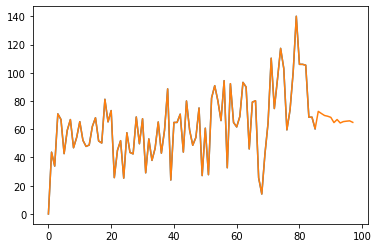

In [198]:
%matplotlib inline
import matplotlib.pyplot as plt

maxChange = max(train[0])

y_pred = model.predict(X_train_t[-12:], batch_size=20)
plt.plot(list(y_train * maxChange) + list(y_test * maxChange))
plt.plot(list(y_train * maxChange) + list(y_test * maxChange) + list(y_pred * maxChange))

Epoch 1/100
69/69 - 2s - loss: 0.1250
Epoch 2/100
69/69 - 0s - loss: 0.0540
Epoch 3/100
69/69 - 0s - loss: 0.0266
Epoch 4/100
69/69 - 0s - loss: 0.0216
Epoch 5/100
69/69 - 0s - loss: 0.0212
Epoch 6/100
69/69 - 0s - loss: 0.0210
Epoch 7/100
69/69 - 0s - loss: 0.0209
Epoch 8/100
69/69 - 0s - loss: 0.0207
Epoch 9/100
69/69 - 0s - loss: 0.0204
Epoch 10/100
69/69 - 0s - loss: 0.0201
Epoch 11/100
69/69 - 0s - loss: 0.0206
Epoch 12/100
69/69 - 0s - loss: 0.0197
Epoch 13/100
69/69 - 0s - loss: 0.0199
Epoch 14/100
69/69 - 0s - loss: 0.0197
Epoch 15/100
69/69 - 0s - loss: 0.0197
Epoch 16/100
69/69 - 0s - loss: 0.0195
Epoch 17/100
69/69 - 0s - loss: 0.0193
Epoch 18/100
69/69 - 0s - loss: 0.0191
Epoch 19/100
69/69 - 0s - loss: 0.0191
Epoch 20/100
69/69 - 0s - loss: 0.0189
Epoch 21/100
69/69 - 0s - loss: 0.0188
Epoch 22/100
69/69 - 0s - loss: 0.0187
Epoch 23/100
69/69 - 0s - loss: 0.0188
Epoch 24/100
69/69 - 0s - loss: 0.0187
Epoch 25/100
69/69 - 0s - loss: 0.0186
Epoch 26/100
69/69 - 0s - loss: 0.

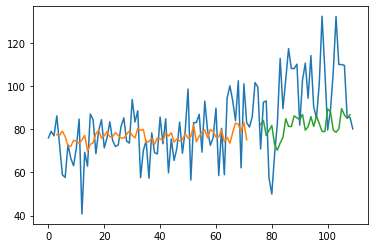

In [199]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = df
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()